In [1]:
import pandas as pd
data=pd.read_csv('classroom_actions.csv')
data.head(10)

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False
5,2015-08-10 19:58:07.004051,763661,control,55,False
6,2015-08-10 20:10:42.230941,634832,control,97,False
7,2015-08-10 20:29:33.099757,849686,control,97,False
8,2015-08-10 21:03:33.719529,929620,experiment,90,False
9,2015-08-10 22:47:00.254898,512761,experiment,59,False


In [3]:
obs_diff=data[data.group=='experiment'].completed.mean()-data[data.group=='control'].completed.mean()
obs_diff

0.02153829499022919

(array([  1.,  10.,  49., 197., 407., 537., 436., 266.,  82.,  15.]),
 array([-0.04143571, -0.03025582, -0.01907594, -0.00789605,  0.00328384,
         0.01446373,  0.02564361,  0.0368235 ,  0.04800339,  0.05918328,
         0.07036316]),
 <a list of 10 Patch objects>)

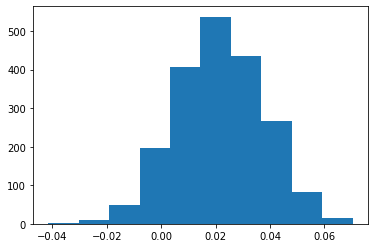

In [13]:
diff=[]
for x in range(2000):
    sample=data.sample(data.shape[0],replace=True)
    diff.append(sample[sample.group=='experiment'].completed.mean()-sample[sample.group=='control'].completed.mean())
import matplotlib.pyplot as plt    
plt.hist(diff)

(array([ 11.,  64., 220., 415., 566., 396., 240.,  67.,  18.,   3.]),
 array([-0.04990287, -0.03893167, -0.02796046, -0.01698926, -0.00601805,
         0.00495315,  0.01592436,  0.02689556,  0.03786677,  0.04883797,
         0.05980918]),
 <a list of 10 Patch objects>)

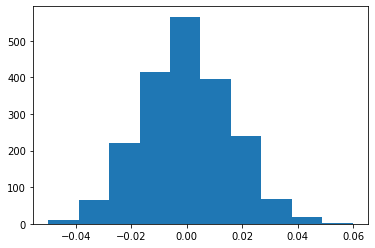

In [15]:
import numpy as np
diff=np.array(diff)
null=np.random.normal(0,diff.std(),diff.size)
plt.hist(null)

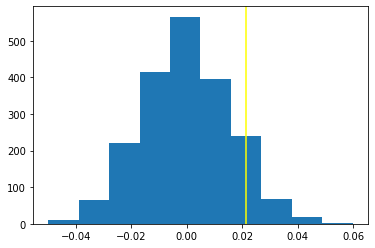

In [16]:
plt.hist(null)
plt.axvline(obs_diff,c = 'yellow')

In [17]:
(null>obs_diff).mean()

0.092

In [11]:
import pandas as pd
data1=pd.read_csv("course_page_actions.csv")
data1.head(20)

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437
5,2016-09-24 22:18:15.857434,266695,experiment,view,151.235475
6,2016-09-24 22:42:41.218757,701620,control,view,302.951552
7,2016-09-24 22:43:35.119748,701620,control,enroll,NaN
8,2016-09-25 01:21:10.649300,321250,experiment,view,98.678583
9,2016-09-25 01:23:19.800167,439910,control,view,61.234458


In [29]:
diff_rate=-data1[data1.group=='control'].duration.mean()+data1[data1.group=='experiment'].duration.mean()
diff_rate

15.537053609623726

In [30]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4069 entries, 0 to 4068
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  4069 non-null   object 
 1   id         4069 non-null   int64  
 2   group      4069 non-null   object 
 3   action     4069 non-null   object 
 4   duration   4044 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 159.1+ KB


In [31]:
means=[]
for x in range(2000):
    sample=data1.sample(data1.shape[0],replace=True)
    means.append(-sample[sample.group=='control'].duration.mean()+sample[sample.group=='experiment'].duration.mean())
    

(array([  5.,  37., 139., 304., 462., 499., 362., 139.,  39.,  14.]),
 array([ 7.83133087,  9.35589037, 10.88044987, 12.40500936, 13.92956886,
        15.45412836, 16.97868785, 18.50324735, 20.02780685, 21.55236634,
        23.07692584]),
 <a list of 10 Patch objects>)

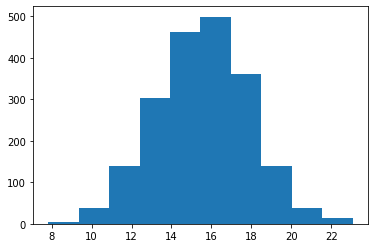

In [32]:
import matplotlib.pyplot as plt
plt.hist(means)

(array([  8.,  43., 142., 272., 463., 465., 346., 182.,  60.,  19.]),
 array([-7.42303561, -5.97958493, -4.53613426, -3.09268359, -1.64923291,
        -0.20578224,  1.23766843,  2.68111911,  4.12456978,  5.56802045,
         7.01147113]),
 <a list of 10 Patch objects>)

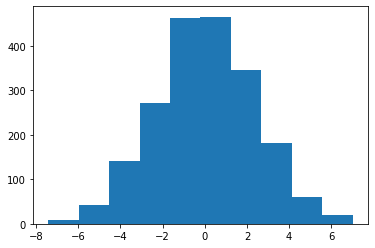

In [36]:
import numpy as np
means=np.array(means)
null=np.random.normal(0,means.std(),means.size)
plt.hist(null)

        

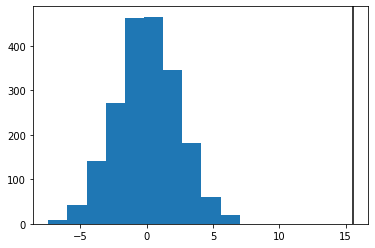

In [37]:
plt.hist(null)
plt.axvline(diff_rate,c = 'black')
        

In [41]:
(diff_rate<null).mean()

0.0